1. Import the csv file into a Data Frame.
2. Identify the number of columns and check the size of the dataframe

In [85]:
import pandas as pd

df = pd.read_csv('loan.csv')

df.columns


/var/folders/77/ctnwfzn11db8gx0b2gh55y0h0000gn/T/ipykernel_2104/1350447619.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Checking if the columns have any null values but seems like the results are not so intuitive to read

In [86]:
df.desc.isnull().sum()

12940

In [87]:
#df['total_bc_limit'].isnull().sum()
#Understand the shape of the DataFrame
df.shape
#df.dropna(axis=1,how='all').dropna(how='all')
#Drop the columns with all the null values
nullDroppedDf = df.dropna(axis=1,how='all').dropna(how='all')




Get the list of all existing columns after deleting the columns with null values

In [88]:
import numpy as np
cols = np.array(nullDroppedDf.columns)
cols.sort()
cols

array(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc',
       'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade', 'tax_liens', 'term', 'title', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url',
       'verification_status', 'zip

Get the list of all the columns which have unique values in all its rows

In [89]:
nullDroppedDf.shape
#(39717, 57)
uniquecols = [col for col in np.array(nullDroppedDf.columns) if nullDroppedDf[col].nunique() == 1]
len(uniquecols)

9

In [90]:
nullDroppedDf[uniquecols].head()

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


Drop all the values with unique values because they will not provide any additional insights into the data

In [91]:
uniqueDroppedDf = nullDroppedDf.drop(nullDroppedDf.columns[nullDroppedDf.nunique() == 1].tolist(),axis=1)
#nullDroppedDf.to_excel('nullDropped.xlsx',index=False)

The shape of the dataframe after deleting the columns which are not relevant

In [92]:
uniqueDroppedDf.shape

(39717, 48)

Final list of columns on which the data analysis needs to be done

In [93]:
uniqueDroppedDf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Understanding some of the columns in the Dataframe

In [94]:
uniqueDroppedDf.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [95]:
uniqueDroppedDf.columns
df.chargeoff_within_12_mths.nunique()

1

In [96]:
uniqueDroppedDf.collection_recovery_fee.value_counts()

0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: collection_recovery_fee, Length: 2616, dtype: int64

In [97]:
uniqueDroppedDf.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [98]:
new_column_names = {'acc_now_delinq':'num_of_curr_delq_acc',
'collection_recovery_fee':'collection_fee_post_chargeoff',
'collections_12_mths_ex_med':'num_of_coll_in_12_mnths_ex_med',
'delinq_2yrs':'num_of_30plus_del_amt_for_2yrs',
'delinq_amnt':'pastdue_owed_amt_on_delq_acct',
'desc':'loan_desc_by_borrower',
'dti':'debt_to_income_ratio',
'earliest_cr_line':'mnth_earliest_crdt_line_opened',
'emp_length':'emplyment_len_yrs',
'emp_title':'borrower_emplymnt_title',
'funded_amnt_inv':'total_committed_amnt_by_investors',
'grade':'assgnd_loan_grade',
'id':'loan_listing_id',
'initial_list_status':'initial_loan_listing_status',
'inq_last_6mths':'num_inq_past_6mnths',
'installment':'mnthly_installment',
'int_rate':'loan_interest_rate',
'issue_d':'loan_funded_mnth',
'last_credit_pull_d':'mnth_recent_credit_pulled',
'last_pymnt_amnt':'last_total_pymnt_amnt_receivd',
'last_pymnt_d':'last_mnth_was_pymnt_receivd',
'loan_amnt':'curr_apprvd_loan_amnt',
'term':'loan_term_mnths',
'next_pymnt_d':'next_payment_date',
'open_acc':'num_of_open_credit_accnts',
'out_prncp':'outstanding_prinpl_amnt',
'out_prncp_inv':'outstanding_prinpl_investors',
'pub_rec':'num_derogtry_publc_recs',
'pub_rec_bankruptcies':'num_publc_rec_bankruptcies',
'purpose':'loan_purpose',
'revol_util':'revolv_util_rate',
'tax_liens':'num_tax_liens',
'title':'loan_title',
'total_acc':'num_total_curr_acc_lines_',
'total_pymnt':'total_payments_received',
'total_pymnt_inv':'total_payments_received_inv',
'total_rec_int':'total_interest_received',
'total_rec_late_fee':'total_late_fee_received',
'total_rec_prncp':'total_principal_received',
'verification_status':'incm_src_verification_status'
}

In [99]:
uniqueDroppedDf = uniqueDroppedDf.rename(columns=new_column_names)

In [100]:
uniqueDroppedDf.columns

Index(['loan_listing_id', 'member_id', 'curr_apprvd_loan_amnt', 'funded_amnt',
       'total_committed_amnt_by_investors', 'loan_term_mnths',
       'loan_interest_rate', 'mnthly_installment', 'assgnd_loan_grade',
       'sub_grade', 'borrower_emplymnt_title', 'emplyment_len_yrs',
       'home_ownership', 'annual_inc', 'incm_src_verification_status',
       'loan_funded_mnth', 'loan_status', 'url', 'loan_desc_by_borrower',
       'loan_purpose', 'loan_title', 'zip_code', 'addr_state',
       'debt_to_income_ratio', 'num_of_30plus_del_amt_for_2yrs',
       'mnth_earliest_crdt_line_opened', 'num_inq_past_6mnths',
       'mths_since_last_delinq', 'mths_since_last_record',
       'num_of_open_credit_accnts', 'num_derogtry_publc_recs', 'revol_bal',
       'revolv_util_rate', 'num_total_curr_acc_lines_',
       'outstanding_prinpl_amnt', 'outstanding_prinpl_investors',
       'total_payments_received', 'total_payments_received_inv',
       'total_principal_received', 'total_interest_received

In [101]:
print(uniqueDroppedDf.dtypes)

loan_listing_id                        int64
member_id                              int64
curr_apprvd_loan_amnt                  int64
funded_amnt                            int64
total_committed_amnt_by_investors    float64
loan_term_mnths                       object
loan_interest_rate                    object
mnthly_installment                   float64
assgnd_loan_grade                     object
sub_grade                             object
borrower_emplymnt_title               object
emplyment_len_yrs                     object
home_ownership                        object
annual_inc                           float64
incm_src_verification_status          object
loan_funded_mnth                      object
loan_status                           object
url                                   object
loan_desc_by_borrower                 object
loan_purpose                          object
loan_title                            object
zip_code                              object
addr_state

In [102]:
uniqueDroppedDf.num_publc_rec_bankruptcies = pd.to_datetime(uniqueDroppedDf.num_publc_rec_bankruptcies)
uniqueDroppedDf.mnth_earliest_crdt_line_opened = pd.to_datetime(uniqueDroppedDf.mnth_earliest_crdt_line_opened,format='%b-%y')
uniqueDroppedDf.next_payment_date = pd.to_datetime(uniqueDroppedDf.next_payment_date,format='%b-%y')
uniqueDroppedDf.mnth_recent_credit_pulled = pd.to_datetime(uniqueDroppedDf.mnth_recent_credit_pulled,format='%b-%y')
uniqueDroppedDf.loan_funded_mnth = pd.to_datetime(uniqueDroppedDf.loan_funded_mnth,format='%b-%y')
uniqueDroppedDf.last_mnth_was_pymnt_receivd = pd.to_datetime(uniqueDroppedDf.last_mnth_was_pymnt_receivd,format='%b-%y')

In [103]:
uniqueDroppedDf.loan_funded_mnth.unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [104]:
uniqueDroppedDf.loan_term_mnths = uniqueDroppedDf.loan_term_mnths.str.replace(' months','')
uniqueDroppedDf.loan_interest_rate = uniqueDroppedDf.loan_interest_rate.str.replace('%','')
uniqueDroppedDf.revolv_util_rate = uniqueDroppedDf.revolv_util_rate.str.replace('%','')

In [105]:
uniqueDroppedDf.loan_term_mnths = uniqueDroppedDf.loan_term_mnths.astype(int)
uniqueDroppedDf.loan_interest_rate = uniqueDroppedDf.loan_interest_rate.astype(float)
uniqueDroppedDf.revolv_util_rate = uniqueDroppedDf.revolv_util_rate.astype(float)

In [106]:
uniqueDroppedDf.member_id.nunique()

39717

In [107]:
uniqueDroppedDf.set_index(keys=['loan_listing_id','member_id'],inplace=True)
uniqueDroppedDf

,,curr_apprvd_loan_amnt,funded_amnt,total_committed_amnt_by_investors,loan_term_mnths,loan_interest_rate,mnthly_installment,assgnd_loan_grade,sub_grade,borrower_emplymnt_title,emplyment_len_yrs,...,total_principal_received,total_interest_received,total_late_fee_received,recoveries,collection_fee_post_chargeoff,last_mnth_was_pymnt_receivd,last_total_pymnt_amnt_receivd,next_payment_date,mnth_recent_credit_pulled,num_publc_rec_bankruptcies
loan_listing_id,member_id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,1970-01-01
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,1970-01-01
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,1970-01-01
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,1970-01-01
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,...,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4 years,...,2500.00,322.97,0.00,0.00,0.00,2010-07-01,80.90,NaT,2010-06-01,NaT
90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,8500.00,1413.49,0.00,0.00,0.00,2010-07-01,281.94,NaT,2010-07-01,NaT
90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,< 1 year,...,5000.00,272.16,0.00,0.00,0.00,2008-04-01,0.00,NaT,2007-06-01,NaT


<BarContainer object of 11 artists>

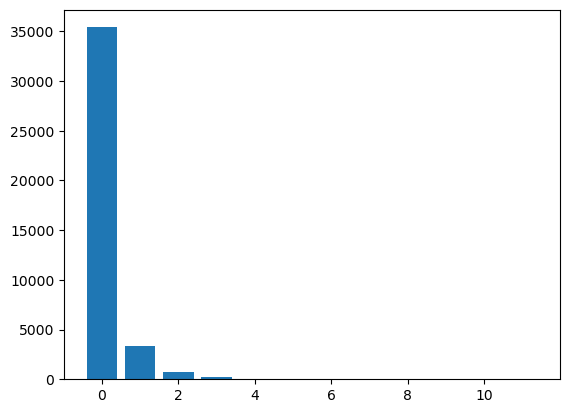

In [108]:
import matplotlib.pyplot as plt

counts = uniqueDroppedDf.num_of_30plus_del_amt_for_2yrs.value_counts()
plt.bar(counts.index,counts.values)




#uniqueDroppedDf.num_of_30plus_del_amt_for_2yrs

In [109]:
udf = uniqueDroppedDf

udf.isna().sum()

#uniqueDroppedDf.to_excel('loan_filtered.xlsx')

curr_apprvd_loan_amnt                    0
funded_amnt                              0
total_committed_amnt_by_investors        0
loan_term_mnths                          0
loan_interest_rate                       0
mnthly_installment                       0
assgnd_loan_grade                        0
sub_grade                                0
borrower_emplymnt_title               2459
emplyment_len_yrs                     1075
home_ownership                           0
annual_inc                               0
incm_src_verification_status             0
loan_funded_mnth                         0
loan_status                              0
url                                      0
loan_desc_by_borrower                12940
loan_purpose                             0
loan_title                              11
zip_code                                 0
addr_state                               0
debt_to_income_ratio                     0
num_of_30plus_del_amt_for_2yrs           0
mnth_earlie

In [110]:
udf.mths_since_last_delinq.value_counts()
udf.mths_since_last_delinq.fillna(0,inplace=True)

In [111]:
udf.mths_since_last_delinq.astype(int)

loan_listing_id  member_id
1077501          1296599       0
1077430          1314167       0
1077175          1313524       0
1076863          1277178      35
1075358          1311748      38
                              ..
92187            92174         0
90665            90607         5
90395            90390         0
90376            89243         0
87023            86999        11
Name: mths_since_last_delinq, Length: 39717, dtype: int64

In [112]:
import seaborn as sns

udf.curr_apprvd_loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: curr_apprvd_loan_amnt, dtype: float64

In [113]:
udf['debt_to_income_ratio'].corr(udf['num_of_30plus_del_amt_for_2yrs'])

-0.03445155788349111

In [114]:
udf['incm_src_verification_status'].value_counts()
chrgdOffLoandf = udf[udf.loan_status == 'Charged Off']

<BarContainer object of 3 artists>

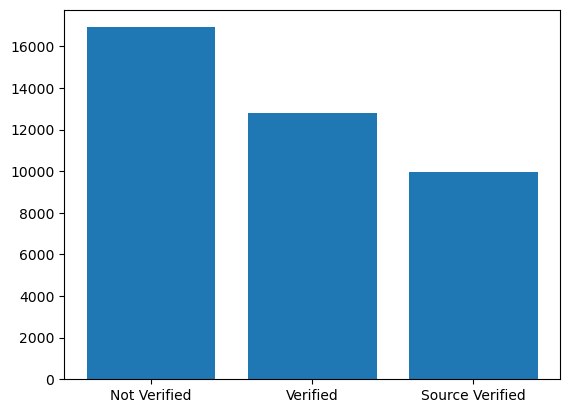

In [115]:
import matplotlib.pyplot as plt
#plt.bar(chrgdOffLoandf['incm_src_verification_status'].value_counts().index,chrgdOffLoandf['incm_src_verification_status'].value_counts().count)
counted = udf['incm_src_verification_status'].value_counts()
plt.bar(counted.index,counted.values)

In [116]:
udf.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

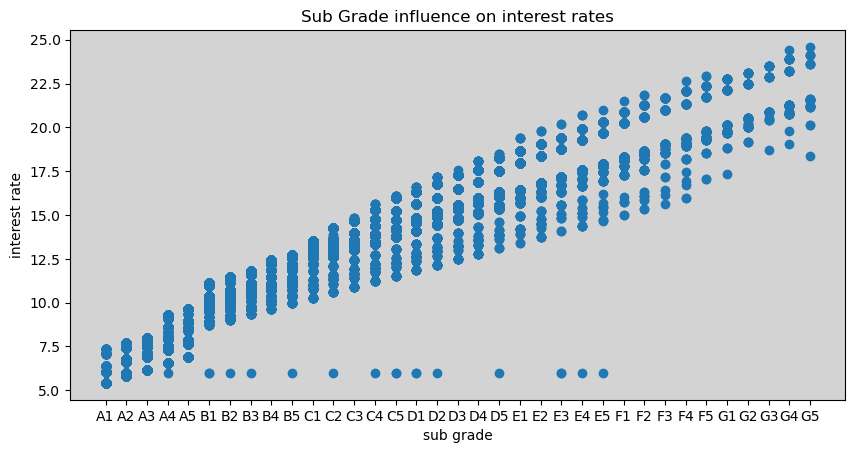

In [117]:

sorted_data = sorted(zip(udf['sub_grade'], udf['loan_interest_rate']))
sorted_x, sorted_y = zip(*sorted_data)

# Create the Figure and Axes objects
fig, ax = plt.subplots()
fig.set_figwidth(10)

# Create the scatter plot
ax.scatter(sorted_x, sorted_y)

# Customize the chart
ax.set_title('Sub Grade influence on interest rates')
ax.set_xlabel('sub grade')
ax.set_ylabel('interest rate')
ax.set_facecolor('lightgray')

# Show the chart
plt.show()


Fully Paid     32950
Charged Off     5627
Current         1140

In [118]:
udf.assgnd_loan_grade.value_counts()
def mapValues(x):
    if (x == 'Charged Off'):
        return -1
    if (x == 'Fully Paid'):
        return 1
    if (x == 'Current'):
        return 0
udf['loan_status_value'] = udf['loan_status'].apply(mapValues)
pd.pivot_table(udf,values='loan_status_value',index='assgnd_loan_grade',columns='loan_status',aggfunc='count')

loan_status,Charged Off,Current,Fully Paid
assgnd_loan_grade,,,
A,602,40,9443
B,1425,345,10250
C,1347,264,6487
D,1118,222,3967
E,715,179,1948
F,319,73,657
G,101,17,198


In [119]:
udf.loan_status_value.value_counts()

 1    32950
-1     5627
 0     1140
Name: loan_status_value, dtype: int64

In [120]:

pd.pivot_table(udf,values='loan_status_value',index='num_of_30plus_del_amt_for_2yrs',columns='loan_status',aggfunc='count')



loan_status,Charged Off,Current,Fully Paid
num_of_30plus_del_amt_for_2yrs,,,
0,4936.0,1019.0,29450.0
1,507.0,96.0,2700.0
2,130.0,14.0,543.0
3,35.0,8.0,177.0
4,13.0,2.0,47.0
5,3.0,1.0,18.0
6,1.0,NaN,9.0
7,1.0,NaN,3.0
8,1.0,NaN,1.0


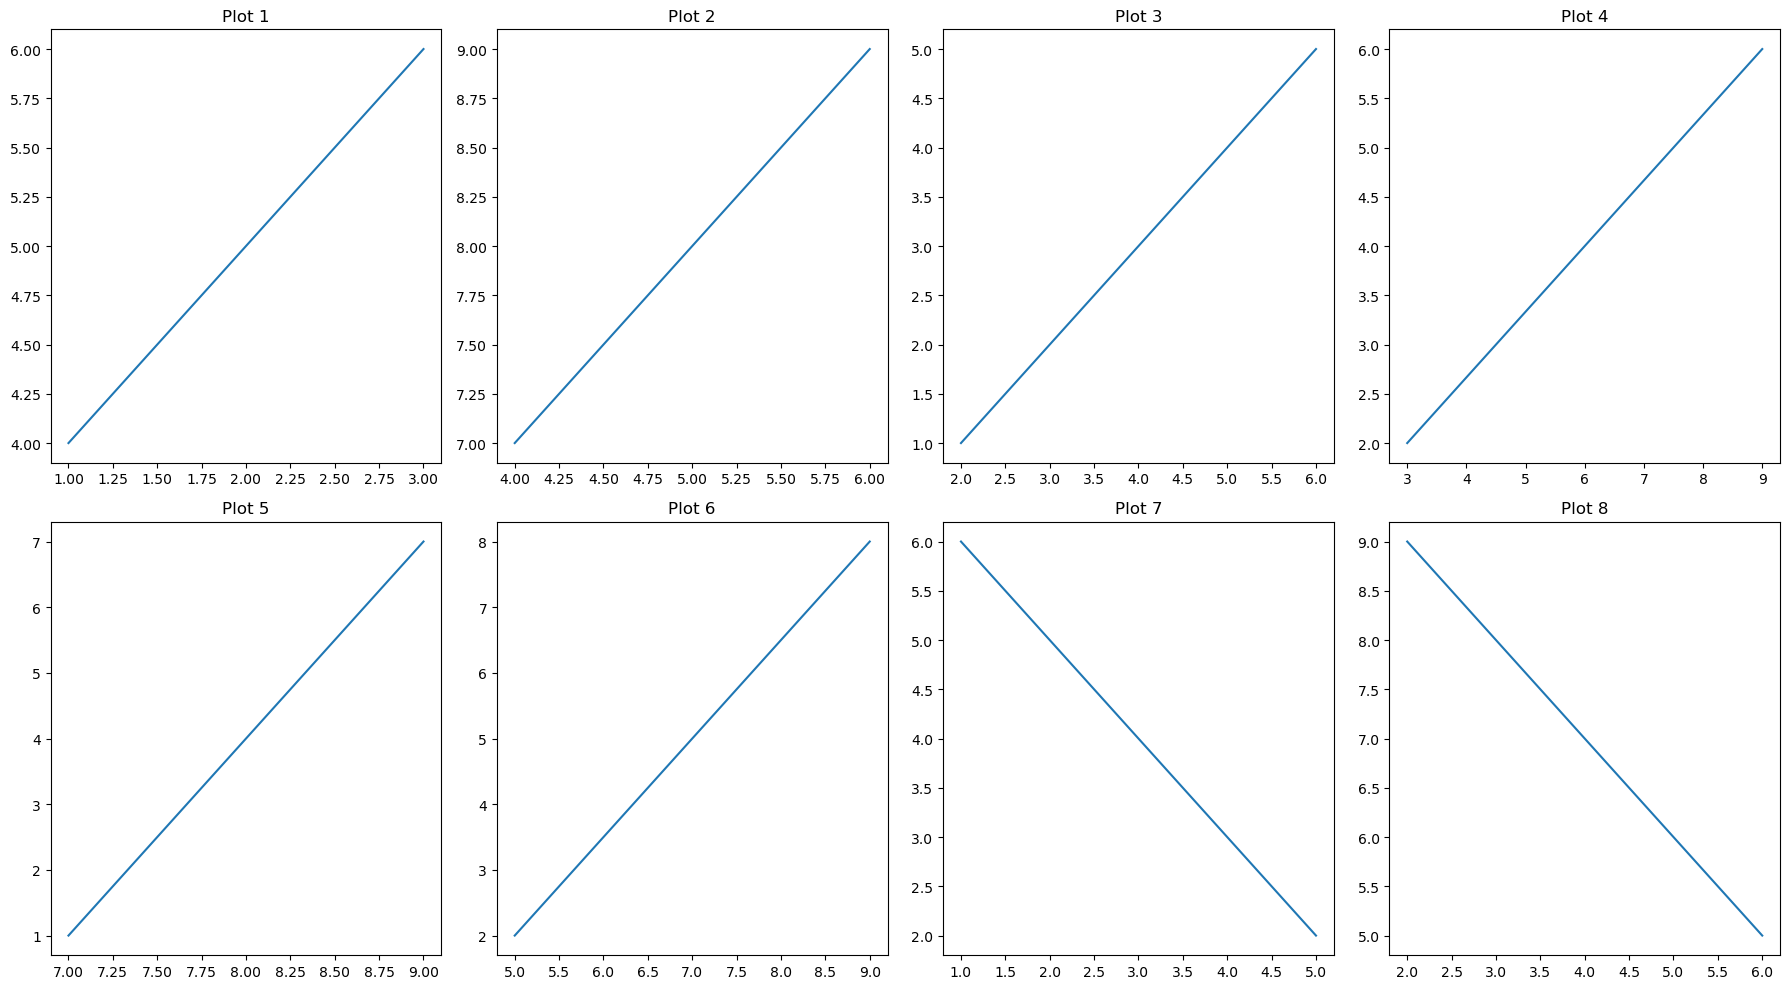

In [121]:

# Create the Figure and Axes objects
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Access each subplot and plot your data,
axes[0, 0].plot([1, 2, 3], [4, 5, 6])
axes[0, 0].set_title('Plot 1')

axes[0, 1].plot([4, 5, 6], [7, 8, 9])
axes[0, 1].set_title('Plot 2')

axes[0, 2].plot([2, 4, 6], [1, 3, 5])
axes[0, 2].set_title('Plot 3')

axes[0, 3].plot([3, 6, 9], [2, 4, 6])
axes[0, 3].set_title('Plot 4')

axes[1, 0].plot([7, 8, 9], [1, 4, 7])
axes[1, 0].set_title('Plot 5')

axes[1, 1].plot([5, 7, 9], [2, 5, 8])
axes[1, 1].set_title('Plot 6')

axes[1, 2].plot([1, 3, 5], [6, 4, 2])
axes[1, 2].set_title('Plot 7')

axes[1, 3].plot([2, 4, 6], [9, 7, 5])
axes[1, 3].set_title('Plot 8')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the Figure with all the subplots
plt.show()
